In [1]:
import os
import tweepy as tw
import pandas as pd

In [2]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# Define the search term and the date_since date as variables
search_words = "#bts"
date_since = "2019-01-01"

In [5]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1500)
tweets


In [6]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

RT @V0TEWITHARMY: [🎷PCAs | The Group of 2020]

Total Estimated Tweets + RTs

1. #BTS      — (2.32M+)
2.                 — (730.6K+) 
3.…
RT @billboard: In a new interview, #BTS discussed politics, how much they want to share with their ARMY and what their Grammy goals are. ht…
RT @BTSMetrics50: 🗳️ 1 RT = 1 VOTE

💬 Reply 5 BTS songs with the leter S on it + "I vote for #BTS under #TheGroup category at #PCAs 2020 @B…
RT @Mashitrique: Hey, like it’s October, and it’s the horror month 🖤✨
I make a little BTS au cute horror for the 1st part of this month. 
S…
RT @minsugacheonye: 💬📸 Weverse - Hoseok

“ 💜 “

#BTS #TheGroup #PCAs @BTS_twt https://t.co/xD2Ekneo3y
RT @jimanfc1306: TikTok
201004 | bts_official_bighit

Suga and j-hope 'Dynamite' hide and seek! 🏃 #BTS #방탄소년단 Dance 'Dynamite' with SUGA &amp;…
@MareeamX Park jimin
I vote for #BTS under #TheGroup category at #PCAs 2020 @BTS_twt
#BTS #OT7 #JIMIN #TAEHYUNG #V #JUNGKOOK 

Concept Photo F https://t.co/CqLCwV9d5l
RT @jongupieguk: @kchartsma

In [7]:
# ABOVE CODE can be replaced by Python List. Collect a list of tweets
[tweet.text for tweet in tweets]

[]

Who is tweeting about BTS?

In [13]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(150)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs


[['jeongoogieeee', ''],
 ['Armyblitar_ofc', 'Blitar, Jawa Timur'],
 ['LilianaYaguasz', 'Lachimolala'],
 ['parkminjinkook', ''],
 ['ellianaiiii', ''],
 ['hebakook8', ''],
 ['AfrozJamima', 'Dhaka, Bangladesh'],
 ['Dang28574105', ''],
 ['jiminvodka95', "Namjoon's heart "],
 ['soloforjhs', 'Hope World'],
 ['KCJin3', ''],
 ['hebakook8', ''],
 ['belen_labarca', ''],
 ['ethereal_JJ', ''],
 ['MrsBrownBee1', "Sope's Micasa "],
 ['NewkiddInt', 'worldwide'],
 ['yatriti', 'California, USA'],
 ['ellianaiiii', ''],
 ['LightJungie', ''],
 ['RegenbogenAura', ''],
 ['hebakook8', ''],
 ['centauri_20', 'Yogyakarta, Indonesia'],
 ['BerryTeaSara', 'Yoongi&Hoseok&Jimin'],
 ['NewkiddInt', 'worldwide'],
 ['AbhilashaGogoi', ''],
 ['hebakook8', ''],
 ['namjoonplaylist', 'Rkive'],
 ['Dang28574105', ''],
 ['vantekosm0s', ''],
 ['SKlTSOPE',
  'bangtan sonyeondan is my beautiful moment, my spring day, and my refuge'],
 ['GenesisRG20', ''],
 ['LeerPorSiempre', 'Peru'],
 ['SKlTSOPE',
  'bangtan sonyeondan is my beaut

In [ ]:
Create a Pandas Dataframe From A List of Tweet Data

In [18]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text[114:119]

,user,location
114,Justxayah,San Fernando Pampanga
115,fatimarvs7,
116,tero_bts,BTS ARMY NAGALAND ⟭⟬ ⟬⟭
117,prplbangwool,taejin 22o leGit hD
118,krystalkiim,Indonesia


Customizing Twitter Queries For instance, if you search for climate+change, Twitter will return all tweets that contain both of those words (in a row) in each tweet.

In [ ]:
new_search = "bts+UNGA+Unicef -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2020-07-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]


["Bro that's prolly why UNICEF invited them to speak at the UNGA again AS REP from UNICEF. \n\nAt least now we can say… https://t.co/IjbfVslEIE",
 '@unicefchief @BTS_twt @UNICEF Thank you Ms. Fore for being supportive of @BTS_twt so they have a voice at the UNGA table.',
 "#FlashbackFriday to @BTS_twt at UNGA two years ago. Thank you for being passionate supporters of @UNICEF's work to… https://t.co/fupnVuixPZ",
 '"Let’s reimagine our world... It might feel like it’s always night and it will always be dark. But the night is alw… https://t.co/50kQ0qhuSt',
 '#BTSWeek #FallonTonight \u2066@jimmyfallon\u2069 \n\nBTS are the only artists in the history \n\nof the @nbc Tonight Show to be f… https://t.co/oqgco5Pdb0']

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]


['Bro thats prolly why UNICEF invited them to speak at the UNGA again AS REP from UNICEF At least now we can say',
 'unicefchief BTStwt UNICEF Thank you Ms Fore for being supportive of BTStwt so they have a voice at the UNGA table',
 'FlashbackFriday to BTStwt at UNGA two years ago Thank you for being passionate supporters of UNICEFs work to',
 'Lets reimagine our world It might feel like its always night and it will always be dark But the night is alw',
 'BTSWeek FallonTonight jimmyfallon BTS are the only artists in the history of the nbc Tonight Show to be f']

In [ ]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]


[['bro',
  'thats',
  'prolly',
  'why',
  'unicef',
  'invited',
  'them',
  'to',
  'speak',
  'at',
  'the',
  'unga',
  'again',
  'as',
  'rep',
  'from',
  'unicef',
  'at',
  'least',
  'now',
  'we',
  'can',
  'say'],
 ['unicefchief',
  'btstwt',
  'unicef',
  'thank',
  'you',
  'ms',
  'fore',
  'for',
  'being',
  'supportive',
  'of',
  'btstwt',
  'so',
  'they',
  'have',
  'a',
  'voice',
  'at',
  'the',
  'unga',
  'table']]

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)


[('the', 27),
 ('you', 19),
 ('unicef', 18),
 ('unga', 17),
 ('btstwt', 17),
 ('to', 15),
 ('of', 9),
 ('a', 9),
 ('our', 9),
 ('bts', 8),
 ('for', 7),
 ('it', 7),
 ('be', 7),
 ('are', 7),
 ('on', 7),
 ('at', 6),
 ('like', 6),
 ('always', 6),
 ('night', 6),
 ('and', 6)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,27
1,you,19
2,unicef,18
3,unga,17
4,btstwt,17


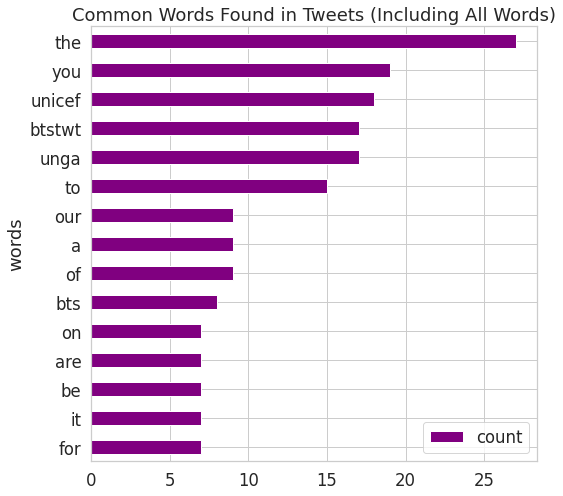

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


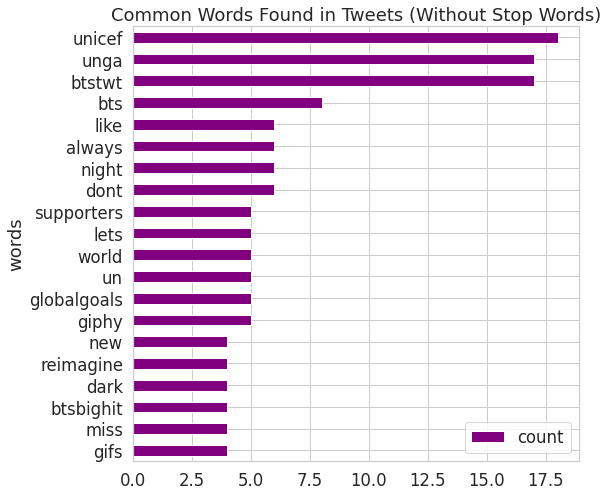

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(20),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [20]:
search_term = "#bts+btsarmy -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]


['@btsroyaIty @BTS_twt I vote for #BTS #Dynamite under #TheSong category at #PCAs 2020 @BTS_twt',
 '@btsroyaIty @BTS_twt I vote for #BTS under #TheGroup category at #PCAs 2020 @BTS_twt',
 '@jooncrabss_ @BTS_twt I vote for #BTS #Dynamite #BTS_Dynamite under #TheMusicVideo category at #PCAs 2020 @BTS_twt',
 '@jooncrabss_ @BTS_twt I vote for #BTS #MapOfTheSoul7 under #TheAlbum category at #PCAs 2020 @BTS_twt',
 'Ohhh my this brings back the memories 👀😱😱\n\nARMY were you part of OUTCAST back in 2018? 🙊\n\n#BTS #BTSARMY @BTS_twt… https://t.co/CH34LIZbHj']

In [24]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [25]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]


['btsroyaIty BTStwt I vote for BTS Dynamite under TheSong category at PCAs 2020 BTStwt',
 'btsroyaIty BTStwt I vote for BTS under TheGroup category at PCAs 2020 BTStwt',
 'jooncrabss BTStwt I vote for BTS Dynamite BTSDynamite under TheMusicVideo category at PCAs 2020 BTStwt',
 'jooncrabss BTStwt I vote for BTS MapOfTheSoul7 under TheAlbum category at PCAs 2020 BTStwt',
 'Ohhh my this brings back the memories ARMY were you part of OUTCAST back in 2018 BTS BTSARMY BTStwt']

Create List of Lower Case Words from Tweets

In [26]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]


[['btsroyaity',
  'btstwt',
  'i',
  'vote',
  'for',
  'bts',
  'dynamite',
  'under',
  'thesong',
  'category',
  'at',
  'pcas',
  '2020',
  'btstwt'],
 ['btsroyaity',
  'btstwt',
  'i',
  'vote',
  'for',
  'bts',
  'under',
  'thegroup',
  'category',
  'at',
  'pcas',
  '2020',
  'btstwt']]

Calculate and Plot Word Frequency

In [27]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)


[('bts', 704),
 ('btstwt', 487),
 ('btsarmy', 409),
 ('for', 349),
 ('the', 323),
 ('i', 270),
 ('to', 259),
 ('a', 199),
 ('dynamite', 164),
 ('vote', 157),
 ('pcas', 155),
 ('you', 153),
 ('at', 143),
 ('and', 130),
 ('2020', 129)]

You can create a Pandas Dataframe for analysis and plotting that includes only the top 15 most common words.

In [28]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,bts,704
1,btstwt,487
2,btsarmy,409
3,for,349
4,the,323


Horizontal bar graph of the top 15 most common words in the tweets as shown below.

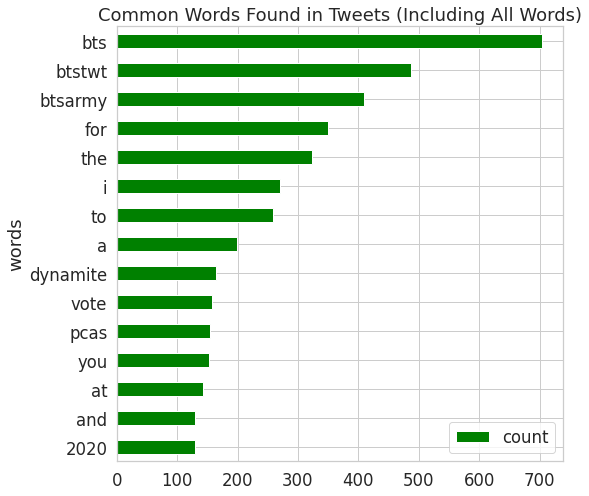

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


Remove Stopwords With nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


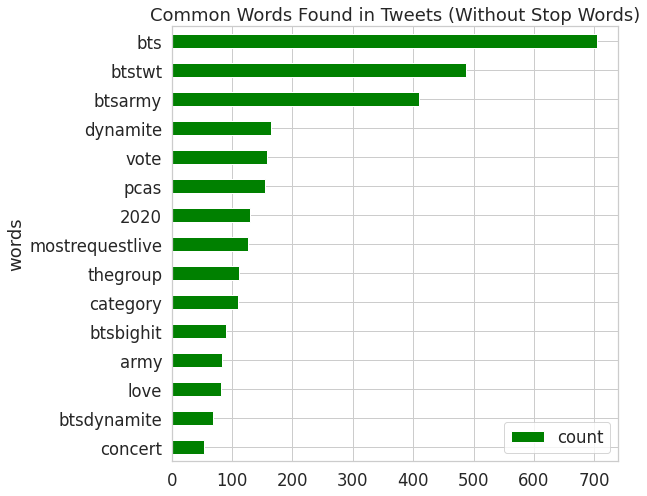

In [30]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [32]:
search_term = "#bts+btsarmy -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(1000)


Analyze The Sentiment of Tweets From Twitter Data and Tweepy in Python

In [33]:
# Remove URLs and create textblob object for each tweet
from textblob import TextBlob
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]


[TextBlob("An online concert BTS is coming Are we ready for Jimins choreography to Filter YesGirl you have yo"),
 TextBlob("My life has been made more meaningful and joyful because of these 7 amazing men Borahae BTS ARMY for life"),
 TextBlob("Run now playing on SpotifyStream herebtsarmy bts BTSDynamite BTStwt"),
 TextBlob("Enter for your chance to win admission to a virtual btsbighit concert PLUS a PlayStation 5 from mostrequestlive"),
 TextBlob("From BTStwt SavageLoveRemix to the glorious BTSWEEK ARMYMAGAZINE")]

In [34]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()


,polarity,tweet
0,0.200000,An online concert BTS is coming Are we ready f...
1,0.533333,My life has been made more meaningful and joyf...
3,0.800000,Enter for your chance to win admission to a vi...
18,0.350000,AttackonBTSCHN BTSbeyou BTStwt Theyre amazing ...
20,0.900000,My Ideal Man Min Yoongi BTStwt SUGA MinYoongiA...


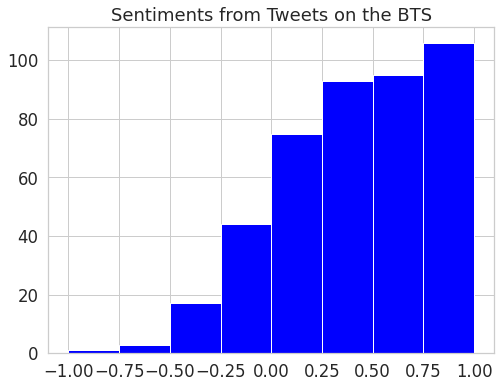

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="blue")

plt.title("Sentiments from Tweets on the BTS")
plt.show()


In [ ]:
from textblob import TextBlob

In [ ]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")

In [ ]:
testimonial.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [ ]:
testimonial.sentiment.subjectivity

0.4357142857142857